# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.classifier import Adaline, Perceptron, LogisticRegression




### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

Total missing values: 0


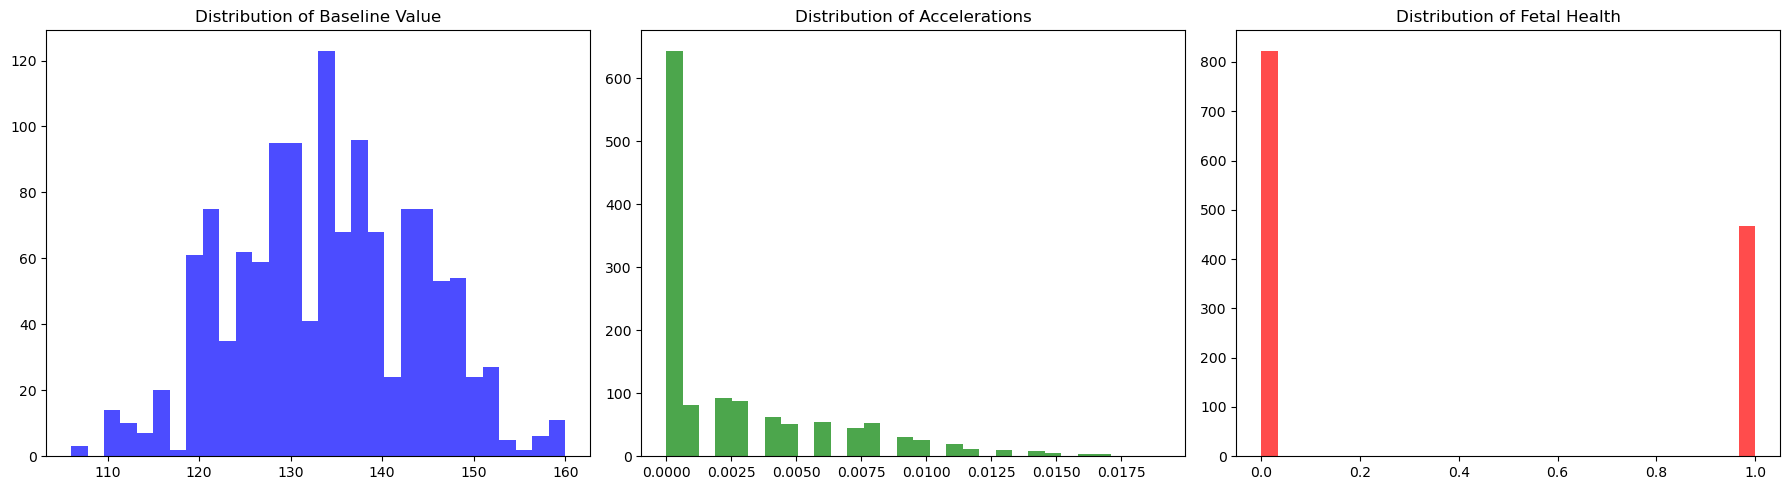

'\n\nIt seems that the data is not linearly seperable as we can see from the plots. \nFor example, we can not seperate the baseline value and the acceleations with a line.\nTherefore we can not expect anything close to 100% accuracy from a linear classifier. \n\n'

In [25]:
#1

df = pd.read_csv("./assets/fetal_health.csv", index_col=0)

#2

missing_value = df.isnull().sum().sum()
print(f"Total missing values: {missing_value}")

#3

features = ["baseline value", "accelerations", "fetal_health"]
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df["baseline value"], bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Baseline Value")

plt.subplot(1, 3, 2)
plt.hist(df["accelerations"], bins=30, color="green", alpha=0.7)
plt.title("Distribution of Accelerations")

plt.subplot(1, 3, 3)
plt.hist(df["fetal_health"], bins=30, color="red", alpha=0.7)
plt.title("Distribution of Fetal Health")

plt.tight_layout()
plt.show()

#4

"""

if we plan to use logistic regression or similar algorthytms, they would perform better if we scaled the acceleration
and the baseline values to be more similar in scale

"""

#5

"""

It seems that the data is not linearly seperable as we can see from the plots. 
For example, we can not seperate the baseline value and the acceleations with a line.
Therefore we can not expect anything close to 100% accuracy from a linear classifier. 

"""



## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [26]:
#1

df_0 = df[df["fetal_health"] == 0]  
df_1 = df[df["fetal_health"] == 1]

#2

df_0_train = df_0.sample(frac=0.75, random_state=42)
df_1_train = df_1.sample(frac=0.75, random_state=42)

df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

#3

df_train = pd.concat([df_0_train, df_1_train])
df_test = pd.concat([df_0_test, df_1_test])

#4

X_train = df_train.drop(columns=["fetal_health"])
X_test = df_test.drop(columns=["fetal_health"])
y_train = df_train["fetal_health"]
y_test = df_test["fetal_health"]


#5

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

#6

"""

We first separate the dataset by class to ensure that both the training and 
test sets have a balanced number of samples from each class. This prevents 
class imbalance, which could negatively affect model performance and evaluation.

"""

#7

full_class_0_pct = 100 * (len(df_0) / len(df))
train_class_0_pct = 100 * (len(df_0_train) / len(df_train))
test_class_0_pct = 100 * (len(df_0_test) / len(df_test))

print(f"Class 0 proportion in full dataset: {full_class_0_pct}%")
print(f"Class 0 proportion in training set: {train_class_0_pct}% ")
print(f"Class 0 propotion in test set: {test_class_0_pct}%")

X_train shape: (967, 8), y_train shape: (967,)
X_test shape: (323, 8), y_test shape: (323,)
Class 0 proportion in full dataset: 63.7984496124031%
Class 0 proportion in training set: 63.805584281282314% 
Class 0 propotion in test set: 63.77708978328174%


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [27]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



Mean of scaled training data (should be ~0): [-1.31803106e-16  4.56925087e-15 -2.96097744e-16  1.33869705e-16
 -2.12543989e-17 -2.86453614e-16 -2.93342278e-16 -7.18717284e-17]
Std of scaled training data (should be ~1): [1. 1. 1. 1. 1. 1. 1. 1.]


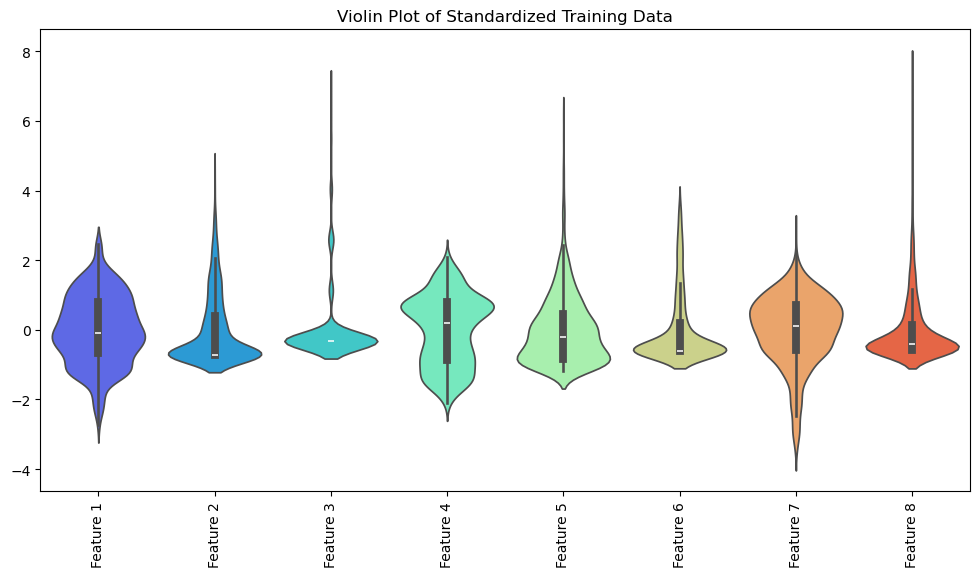

In [28]:
X_mean = X_train.mean(axis=0)  
X_std = X_train.std(axis=0)  

X_train_scaled = (X_train - X_mean) / X_std  
X_test_scaled = (X_test - X_mean) / X_std  


print("Mean of scaled training data (should be ~0):", X_train_scaled.mean(axis=0))
print("Std of scaled training data (should be ~1):", X_train_scaled.std(axis=0))


df_train_scaled = pd.DataFrame(X_train_scaled, columns=[f"Feature {i+1}" for i in range(X_train.shape[1])])

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_train_scaled, palette="rainbow")
plt.xticks(rotation=90)
plt.title("Violin Plot of Standardized Training Data")
plt.show()

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [30]:
dataset_sizes = np.arange(50, 751, 50)
epochs_list = np.arange(2, 102, 5)
 
accuracies = np.zeros((3, len(dataset_sizes), len(epochs_list)))
 
classifiers = {
    "Adaline": Adaline(eta = 1e-4, minibatches = 1, random_seed = 42),
    "Perceptron": Perceptron(eta = 1e-4, random_seed = 42),
    "LogisticRegression": LogisticRegression(eta = 1e-4, minibatches = 1, random_seed = 42),
}
 
keys = classifiers.keys()
 
for clf_name in keys:
    clf = classifiers[clf_name]
    clf_index = list(keys).index(clf_name)
   
    for size_index, size in enumerate(dataset_sizes):
        X_train_subset, y_train_subset = X_train_scaled[:size], y_train[:size]
 
        for epoch_index, epochs in enumerate(epochs_list):
            clf.epochs = epochs
            clf.fit(X_train_subset, y_train_subset)
 
            y_pred = clf.predict(X_test_scaled)
            accuracy = np.sum(y_pred == y_test) / len(y_test)
            accuracies[clf_index, size_index, epoch_index] = accuracy
 
            print(f"Model {clf_name}-{size}-{epochs}: Accuracy {accuracy:.4f}")
 
 

        

Model Adaline-50-2: Accuracy 0.8019
Model Adaline-50-7: Accuracy 0.8514
Model Adaline-50-12: Accuracy 0.8669
Model Adaline-50-17: Accuracy 0.8638
Model Adaline-50-22: Accuracy 0.8638
Model Adaline-50-27: Accuracy 0.8607
Model Adaline-50-32: Accuracy 0.8607
Model Adaline-50-37: Accuracy 0.8576
Model Adaline-50-42: Accuracy 0.8576
Model Adaline-50-47: Accuracy 0.8576
Model Adaline-50-52: Accuracy 0.8607
Model Adaline-50-57: Accuracy 0.8607
Model Adaline-50-62: Accuracy 0.8638
Model Adaline-50-67: Accuracy 0.8638
Model Adaline-50-72: Accuracy 0.8638
Model Adaline-50-77: Accuracy 0.8669
Model Adaline-50-82: Accuracy 0.8700
Model Adaline-50-87: Accuracy 0.8669
Model Adaline-50-92: Accuracy 0.8669
Model Adaline-50-97: Accuracy 0.8700
Model Adaline-100-2: Accuracy 0.8266
Model Adaline-100-7: Accuracy 0.8731
Model Adaline-100-12: Accuracy 0.8700
Model Adaline-100-17: Accuracy 0.8700
Model Adaline-100-22: Accuracy 0.8762
Model Adaline-100-27: Accuracy 0.8762
Model Adaline-100-32: Accuracy 0.879

KeyboardInterrupt: 

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

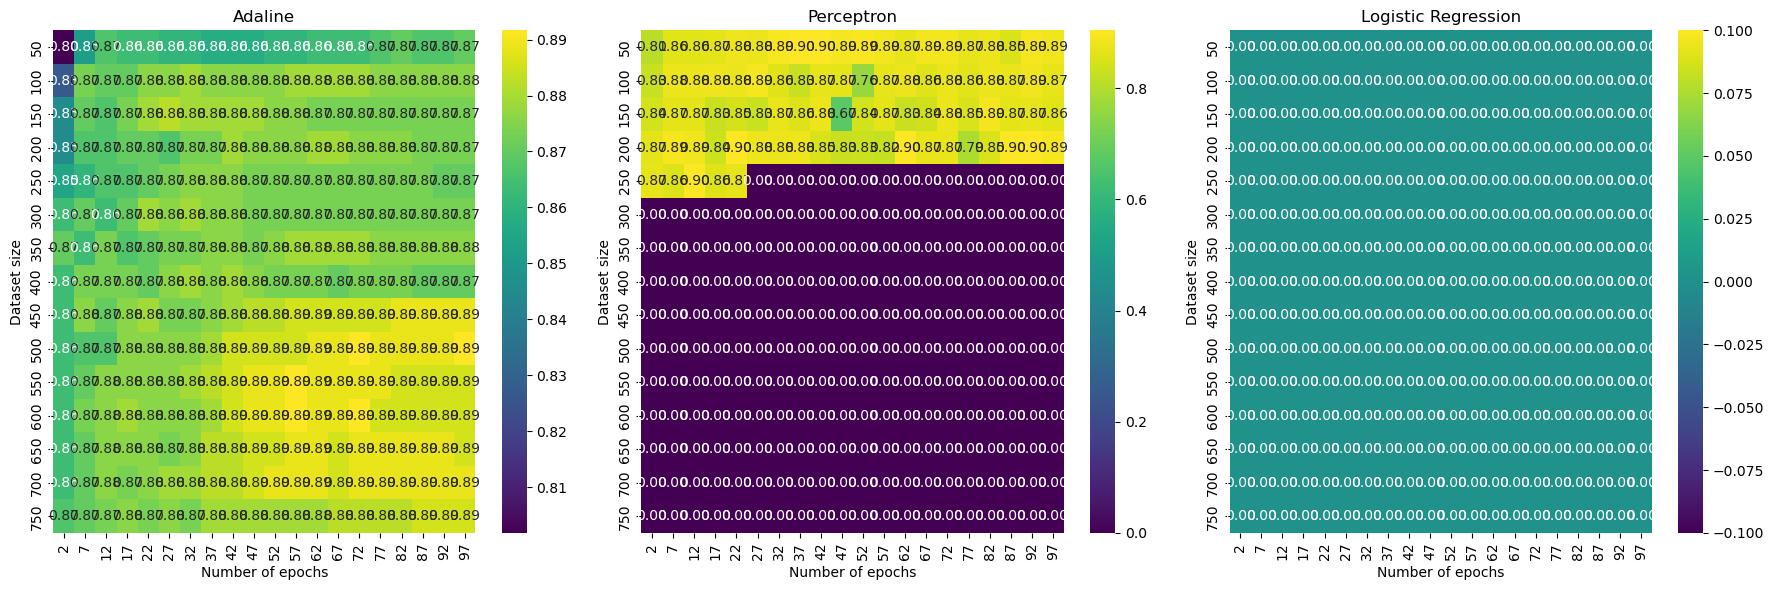

In [ ]:

dataset_labels = dataset_sizes  
epochs_labels = epochs_list    
classifier_names = ["Adaline", "Perceptron", "Logistic Regression"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    sns.heatmap(
        accuracies[i],  
        annot=True,      
        fmt=".2f",      
        cmap="viridis",  
        xticklabels=epochs_labels,
        yticklabels=dataset_labels,
        ax=ax
    )

    ax.set_title(f"{classifier_names[i]}")
    ax.set_xlabel("Number of epochs")
    ax.set_ylabel("Dataset size")

plt.tight_layout()
plt.show()


# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

In [ ]:
# Train a logistic regression model with 300 epochs and a learning rate of 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
clf.fit(X_test_scaled, y_test)  # Fit the model using the test dataset

# Create a figure with an 8x8 grid of subplots, each 30x30 inches
fig, axes = plt.subplots(8, 8, figsize=(30, 30))

# Iterate through all 8x8 subplots to visualize decision boundaries for pairs of features
for i in range(0, 8):  # Loop over 8 features for the first axis
    for j in range(0, 8):  # Loop over 8 features for the second axis
        feature_1 = i  # Select the first feature for this subplot
        feature_2 = j  # Select the second feature for this subplot
        ax = axes[i, j]  # Get the specific subplot at position (i, j)

        ax.set_xlabel(f"Feature {feature_1}")  # Set the x-axis label
        ax.set_ylabel(f"Feature {feature_2}")  # Set the y-axis label

        # Get the minimum and maximum values for the selected features
        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        # Create 100 evenly spaced points between min and max for both features
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # Generate a grid of all possible combinations of the two selected features
        X0, X1 = np.meshgrid(x0, x1)
        X_two_features = np.c_[X0.ravel(), X1.ravel()]  # Flatten the grid into a list of points
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))  # Create an empty array with the same number of features as the test set

        # Assign values to only the selected features; the rest remain zero
        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # Predict the probability of class 1 for the generated data points
        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)  # Reshape predictions to match the grid

        # Plot decision boundaries with color coding
        ax.pcolor(X0, X1, Z)  
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')  # Draw the decision boundary at 50% probability

        # Plot actual test data points using the selected feature pair
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], 
                   color="b", marker="^", s=50, facecolors="none")  # Class 0, blue triangles
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], 
                   color="y", marker="o", s=50, facecolors="none")  # Class 1, yellow circles

# Adjust layout to avoid overlap
fig.tight_layout()

# Display the plot
plt.show()


"""
1) The purpose of this plot is to visualize how the logistic regression model classifies test samples based on different feature pairs.

Each subplot represents a decision boundary when the model considers only two features at a time.
The background color represents the model’s confidence in classifying an area as either class 0 or class 1.
The black contour line represents the decision boundary, where the model assigns a 50% probability to each class.
The test dataset points are plotted on top to show how well the model aligns with the real data.
This visualization helps identify which feature pairs are effective at separating the two classes.

2) Each of the 64 subplots contains the following elements:

X- and Y-Axes
Represent the values of the two selected features being plotted.
The labels indicate the feature numbers, formatted as Feature i and Feature j, where i and j are the indices of the selected features.
Background Color (Decision Region)
The background color indicates the model's predicted probability for a given region.
Lighter or darker shades indicate the model's confidence in assigning a point to class 0 (blue) or class 1 (yellow).
Decision Boundary (Black Contour Line)
This line marks the 50% probability threshold, meaning the model is equally confident about assigning points on this line to either class.
The shape of the boundary gives insight into how well the model has learned to separate the two classes.
Test Data Points
Blue triangles: Represent test set samples belonging to class 0.
Yellow circles: Represent test set samples belonging to class 1.
These show the actual distribution of the data, allowing us to compare the model’s predictions with reality.

"""



## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?
We used: Histograms and violin plots. 

Histograms were used to display the distribution of individual features, helping to identify skewness, outliers and overall spread.

A violin plot was used to visualize the distribution of the standardized training data (X_train_scaled). This was done after feature standardization, where the features were scaled to have a mean of 0 and a standard deviation of 1.

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?
If the dataset is ordered in a structured way the model may learn patterns that are not representative of the entire dataset.
For models like Adaline, Perceptron, and Logistic Regression, which rely on gradient descent, non-random ordering can lead to 
slow convergence or even divergence, as updates are heavily influenced by the order of data.
2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.
As the dataset size increases, the permormance of logistic regression improves and becomes more stable. As the number of traning samples increases, the model generalizes better, leading to higher accuracy on the test set.
2. Describe the relationship between the number of epochs and model accuracy
Increasing the number of epochs improves model accuracy because the model gets more opportunities to adjust its paramters. 
If too many epochs are used, the model risks overfitting, meaning it performs well on the training set but worse on the new unseen data. 
3. Which classifier is much slower to train and why do you think that is? Adaline is the slowest because it uses gradient descent for weight updates. It means that it computes the error and adjusts the weights in each iteration. 
4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens? The perceptron model is highly sensitive to dataset size and muber of epochs. Perceptron does not use a loss function like logistic regression; instead, it updates weights only when a misclassification occurs.